In [1]:
#Import the data
import numpy as np
import pandas as pd
df = pd.read_csv("C:\\Users\\PC-LENOVO\\Desktop\\ExcelR Assginments\\Support Vector Machine\\forestfires.csv")

In [2]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
df.shape  #(517, 31)

(517, 31)

In [5]:
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


In [6]:
#EDA----->EXPLORATORY DATA ANALYSIS
#BOXPLOT AND OUTLIERS CALCULATION #
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
data = df.iloc[:,2:11]
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


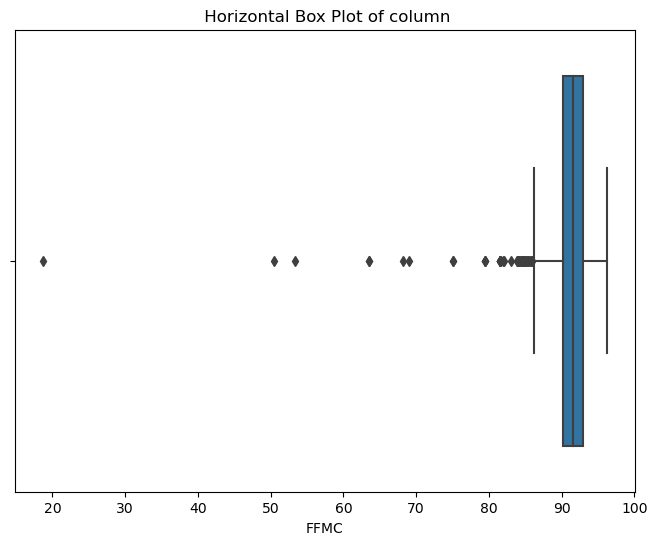

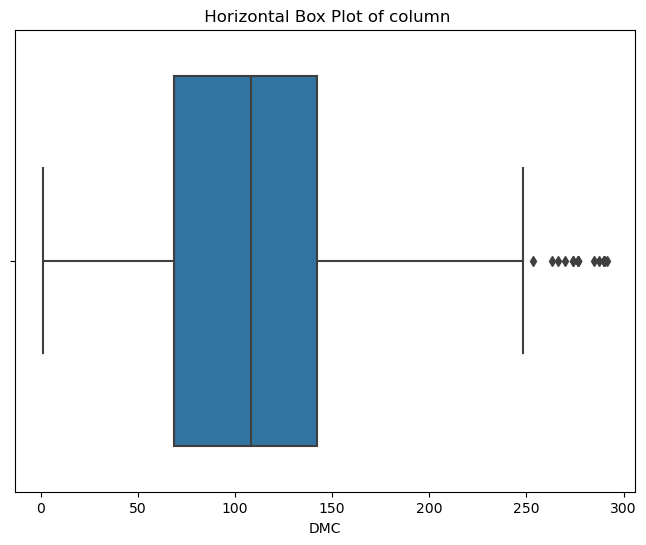

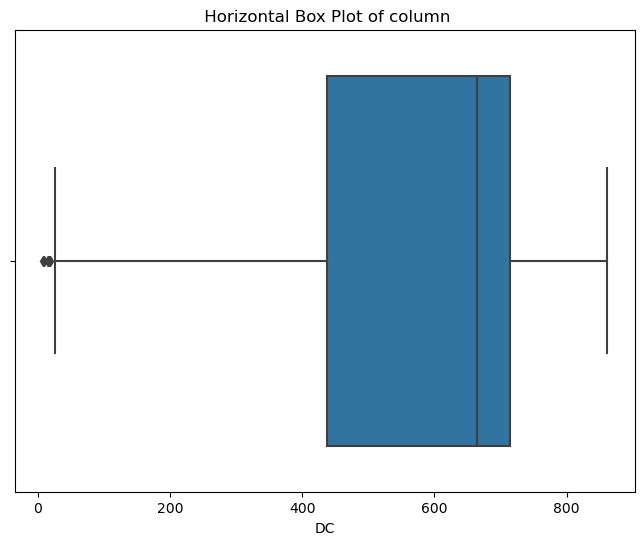

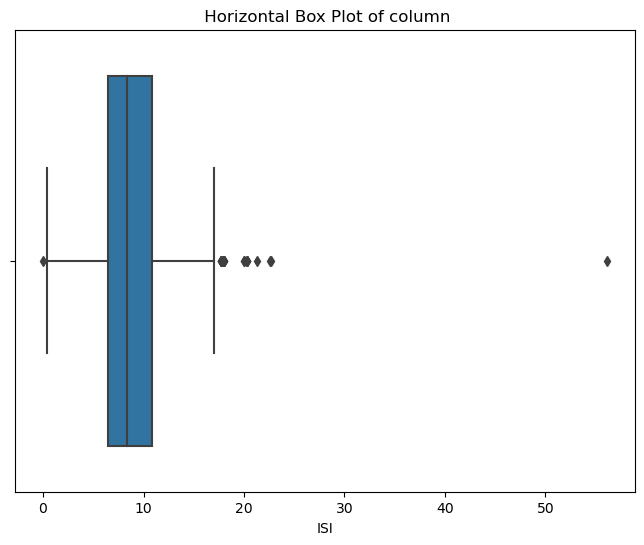

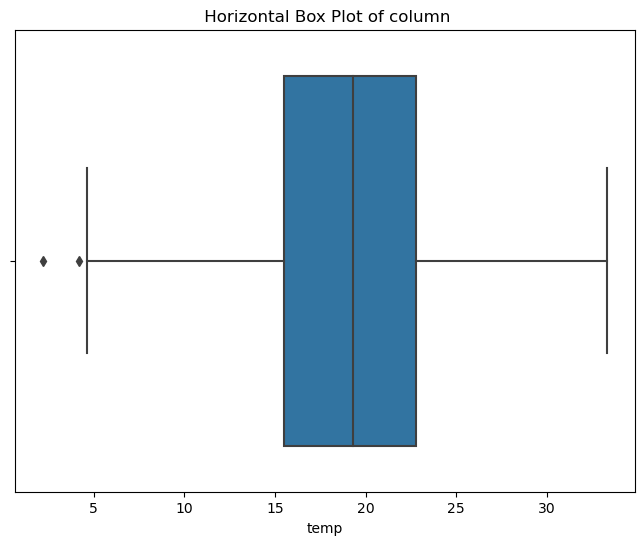

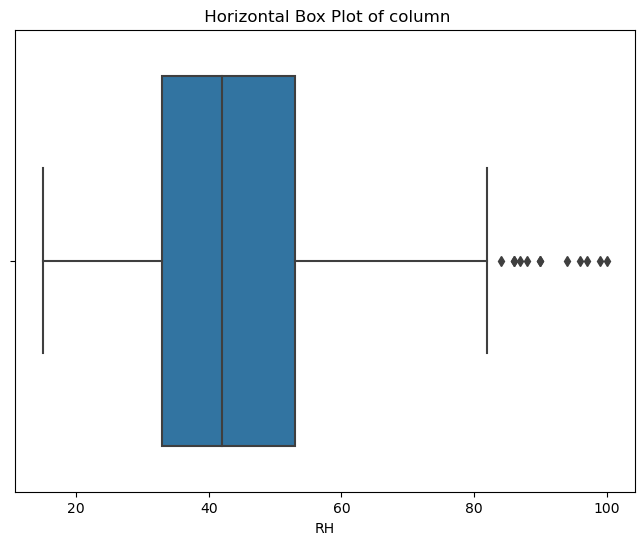

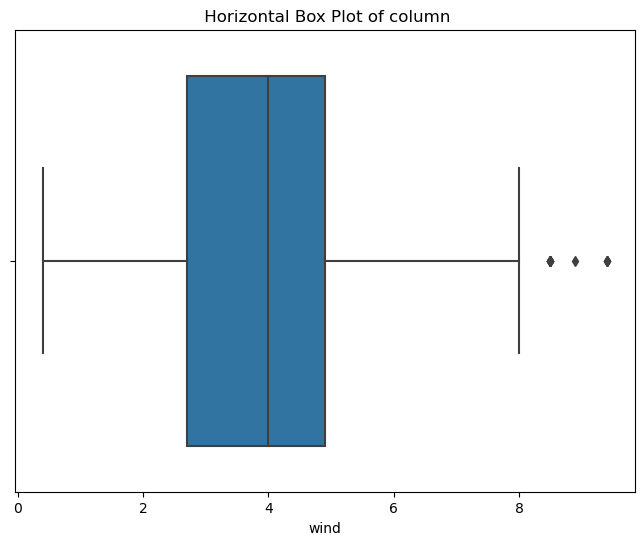

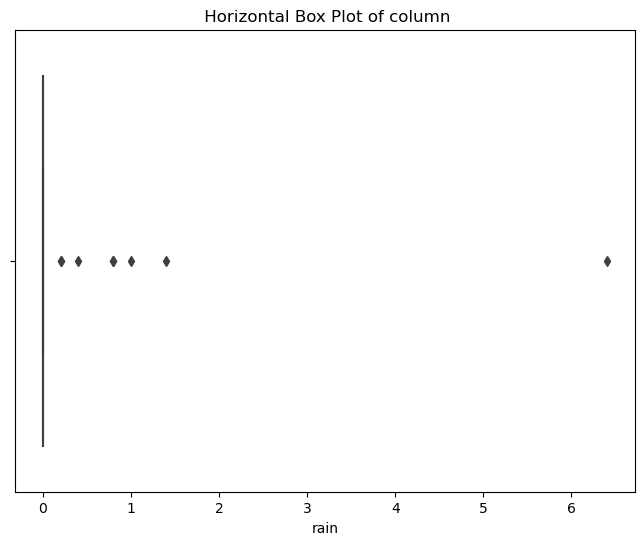

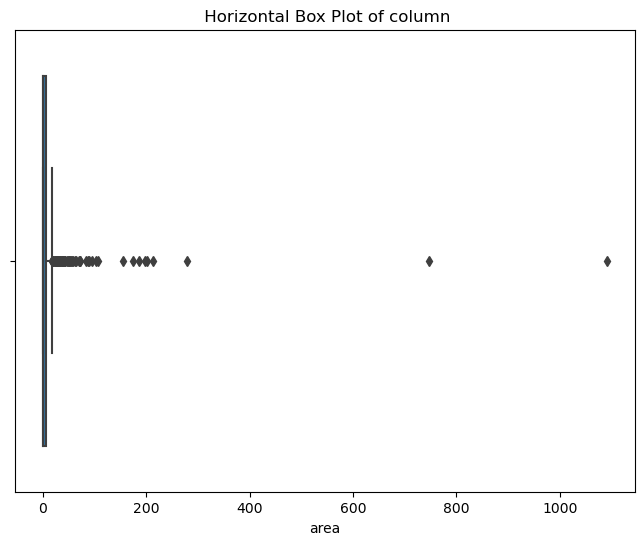

In [8]:
for column in data:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df[column])
    plt.title(" Horizontal Box Plot of column")
    plt.show()
#we have seen the ouliers , so we will try to remove them

In [12]:
"""removing the outliers"""

import seaborn as sns
import matplotlib.pyplot as plt
# List of column names with continuous variables

In [13]:
continuous_columns = df.iloc[:,2:11]
continuous_columns.shape #(138, 9)

(517, 9)

In [14]:
# Create a new DataFrame without outliers for each continuous column
data_without_outliers = df.copy()

In [15]:
for column in continuous_columns:
    Q1 = data_without_outliers[column].quantile(0.25)
    Q3 = data_without_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    data_without_outliers = data_without_outliers[(data_without_outliers[column] >= lower_whisker) & (data_without_outliers[column] <= upper_whisker)]

In [16]:
# Print the cleaned data without outliers
print(data_without_outliers)
data_without_outliers.shape   #(302, 31)

    month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
5     aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0  ...         0   
6     aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0  ...         0   
8     sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
506   aug  fri  91.0  166.9  752.6   7.1  18.5  73   8.5   0.0  ...         0   
507   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0  ...         0   
508   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0  ...         0   
510   aug  fri  91.0  166.9  752.6   7.1  18.2  62   5.4   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   

     monthjan  monthjul  mo

(302, 31)

In [17]:
df = data_without_outliers
df.shape

(302, 31)

In [18]:
# Check the shape and info of the cleaned DataFrame
print(df.shape)   #(302, 31)
print(df.info())

(302, 31)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 1 to 515
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          302 non-null    object 
 1   day            302 non-null    object 
 2   FFMC           302 non-null    float64
 3   DMC            302 non-null    float64
 4   DC             302 non-null    float64
 5   ISI            302 non-null    float64
 6   temp           302 non-null    float64
 7   RH             302 non-null    int64  
 8   wind           302 non-null    float64
 9   rain           302 non-null    float64
 10  area           302 non-null    float64
 11  dayfri         302 non-null    int64  
 12  daymon         302 non-null    int64  
 13  daysat         302 non-null    int64  
 14  daysun         302 non-null    int64  
 15  daythu         302 non-null    int64  
 16  daytue         302 non-null    int64  
 17  daywed         302 non-null    int64  
 18  

array([[<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'dayfri'}>],
       [<AxesSubplot:title={'center':'daymon'}>,
        <AxesSubplot:title={'center':'daysat'}>,
        <AxesSubplot:title={'center':'daysun'}>,
        <AxesSubplot:title={'center':'daythu'}>,
        <AxesSubplot:title={'center':'daytue'}>],
       [<AxesSubplot:title={'center':'daywed'}>,
        <AxesSubplot:title={'center':'monthapr'}>,
        <AxesSubplot:title={'center':'monthaug'}>,
        <AxesSubplot:title={'center':'monthdec'}>,
        <AxesSubplot:title={'center':'monthfeb'}>],
       [<AxesSubplot:title={'cen

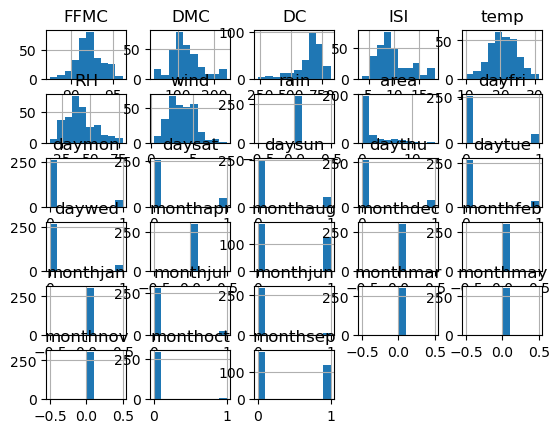

In [19]:
#HISTOGRAM BUILDING, SKEWNESS AND KURTOSIS CALCULATION #
df.hist()

In [20]:
df.skew()

C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_16752\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


FFMC        0.042944
DMC         0.696208
DC         -1.463159
ISI         0.860113
temp        0.003117
RH          0.640382
wind        0.422254
rain        0.000000
area        1.809439
dayfri      1.841354
daymon      2.179404
daysat      1.909457
daysun      1.684785
daythu      2.222815
daytue      2.362116
daywed      2.314070
monthapr    0.000000
monthaug    0.323583
monthdec    0.000000
monthfeb    0.000000
monthjan    0.000000
monthjul    3.125152
monthjun    4.736098
monthmar    0.000000
monthmay    0.000000
monthnov    0.000000
monthoct    4.973712
monthsep    0.309773
dtype: float64

In [21]:
df.kurt()

C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_16752\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


FFMC         0.134145
DMC          0.575052
DC           2.133414
ISI         -0.066905
temp        -0.058701
RH           0.113387
wind        -0.208370
rain         0.000000
area         2.642434
dayfri       1.399812
daymon       2.768091
daysat       1.656954
daysun       0.844046
daythu       2.960468
daytue       3.603412
daywed       3.377243
monthapr     0.000000
monthaug    -1.907974
monthdec     0.000000
monthfeb     0.000000
monthjan     0.000000
monthjul     7.818310
monthjun    20.566783
monthmar     0.000000
monthmay     0.000000
monthnov     0.000000
monthoct    22.889358
monthsep    -1.916779
dtype: float64

In [22]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.0,302.000000,302.000000,...,302.0,302.0,302.0,302.00000,302.000000,302.0,302.0,302.0,302.000000,302.000000
mean,92.182450,122.184768,650.062252,9.788742,20.784768,41.582781,3.662914,0.0,2.012086,0.162252,...,0.0,0.0,0.0,0.07947,0.039735,0.0,0.0,0.0,0.036424,0.423841
std,1.577875,41.989573,114.621879,3.236617,4.101798,12.783844,1.606015,0.0,3.216475,0.369293,...,0.0,0.0,0.0,0.27092,0.195660,0.0,0.0,0.0,0.187653,0.494986
min,87.500000,35.400000,232.100000,3.700000,10.100000,15.000000,0.400000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,91.100000,96.750000,609.400000,7.200000,18.025000,33.000000,2.200000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,92.100000,114.900000,684.800000,9.000000,20.600000,40.000000,3.600000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,93.100000,142.400000,721.400000,11.825000,23.700000,48.000000,4.900000,0.0,2.747500,0.000000,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,1.000000
max,96.200000,235.100000,822.800000,18.000000,31.000000,78.000000,8.900000,0.0,14.570000,1.000000,...,0.0,0.0,0.0,1.00000,1.000000,0.0,0.0,0.0,1.000000,1.000000


In [23]:
#Continous Variables 
df_cont = df.drop(df.columns[[0,1,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]],axis=1)

In [24]:
df_cont.shape   #(302, 9)

(302, 9)

In [25]:
df_cont.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
8,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0


In [26]:
#Standardisation 
from sklearn.preprocessing import StandardScaler

In [27]:
SS = StandardScaler()
SS_X = SS.fit_transform(df_cont)

In [28]:
SS_X

array([[-1.00456395, -2.07024753,  0.16636742, ..., -1.72320899,
         0.        , -0.62659461],
       [-1.00456395, -1.87225133,  0.32191838, ..., -1.47373195,
         0.        , -0.62659461],
       [ 0.07462235, -0.87988482, -1.41623254, ...,  1.08340776,
         0.        , -0.62659461],
       ...,
       [-0.75063776,  1.06668025,  0.89605873, ..., -0.03923894,
         0.        , -0.62659461],
       [-0.75063776,  1.06668025,  0.89605873, ...,  1.08340776,
         0.        , -0.49268599],
       [ 1.40773483,  0.5681115 , -0.30902428, ...,  0.21023811,
         0.        , -0.62659461]])

In [29]:
X1 =pd.DataFrame(SS_X)

In [30]:
X1.columns = list(df_cont)

In [31]:
X1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.004564,-2.070248,0.166367,-0.955896,-0.680041,-0.672492,-1.723209,0.0,-0.626595
1,-1.004564,-1.872251,0.321918,-0.955896,-1.510321,-0.672492,-1.473732,0.0,-0.626595
2,0.074622,-0.879885,-1.416233,1.519924,0.345600,-0.985906,1.083408,0.0,-0.626595
3,0.074622,-0.794007,-1.349818,-0.398836,0.809580,-1.142613,-0.351085,0.0,-0.626595
4,-0.750638,0.174505,0.371730,-0.863053,-1.876621,1.678115,1.083408,0.0,-0.626595


In [32]:
X1.shape #(302, 9)

(302, 9)

In [33]:
X1.dropna()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.004564,-2.070248,0.166367,-0.955896,-0.680041,-0.672492,-1.723209,0.0,-0.626595
1,-1.004564,-1.872251,0.321918,-0.955896,-1.510321,-0.672492,-1.473732,0.0,-0.626595
2,0.074622,-0.879885,-1.416233,1.519924,0.345600,-0.985906,1.083408,0.0,-0.626595
3,0.074622,-0.794007,-1.349818,-0.398836,0.809580,-1.142613,-0.351085,0.0,-0.626595
4,-0.750638,0.174505,0.371730,-0.863053,-1.876621,1.678115,1.083408,0.0,-0.626595
...,...,...,...,...,...,...,...,...,...
297,-0.750638,1.066680,0.896059,-0.832105,-0.557941,2.461651,3.016855,0.0,-0.626595
298,-0.750638,1.066680,0.896059,-0.832105,1.249140,-0.045663,-0.039239,0.0,-0.626595
299,-0.750638,1.066680,0.896059,-0.832105,1.249140,-0.045663,-0.039239,0.0,-0.626595
300,-0.750638,1.066680,0.896059,-0.832105,-0.631201,1.599762,1.083408,0.0,-0.492686


In [34]:
#Categorical Variables
df_cat = df[df.columns[[0,1,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]]

In [35]:
df_cat.shape  #(302, 22)

(302, 22)

In [36]:
df_cat.head()

,month,day,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
1,oct,tue,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,small
5,aug,sun,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,small


In [37]:
#Label Encoding
from  sklearn.preprocessing import LabelEncoder 
LE = LabelEncoder()

In [38]:
# Loop through each column and label encode its values
for col in df_cat:
    df_cat[col] = LE.fit_transform(df_cat[col])

C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_16752\473244546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = LE.fit_transform(df_cat[col])


In [39]:
df_cat.head()

,month,day,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
1,3,5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,3,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,0,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,4,5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [40]:
df_cat.shape

(302, 22)

In [41]:
df_cat.reset_index(drop=True, inplace=True)

In [42]:
X1.reset_index(drop=True, inplace=True)

In [43]:
#Concatenation
df_final = pd.concat([X1,df_cat],axis=1)
df_final

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-1.004564,-2.070248,0.166367,-0.955896,-0.680041,-0.672492,-1.723209,0.0,-0.626595,3,...,0,0,0,0,0,0,0,1,0,1
1,-1.004564,-1.872251,0.321918,-0.955896,-1.510321,-0.672492,-1.473732,0.0,-0.626595,3,...,0,0,0,0,0,0,0,1,0,1
2,0.074622,-0.879885,-1.416233,1.519924,0.345600,-0.985906,1.083408,0.0,-0.626595,0,...,0,0,0,0,0,0,0,0,0,1
3,0.074622,-0.794007,-1.349818,-0.398836,0.809580,-1.142613,-0.351085,0.0,-0.626595,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.750638,0.174505,0.371730,-0.863053,-1.876621,1.678115,1.083408,0.0,-0.626595,4,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,-0.750638,1.066680,0.896059,-0.832105,-0.557941,2.461651,3.016855,0.0,-0.626595,0,...,0,0,0,0,0,0,0,0,0,1
298,-0.750638,1.066680,0.896059,-0.832105,1.249140,-0.045663,-0.039239,0.0,-0.626595,0,...,0,0,0,0,0,0,0,0,0,1
299,-0.750638,1.066680,0.896059,-0.832105,1.249140,-0.045663,-0.039239,0.0,-0.626595,0,...,0,0,0,0,0,0,0,0,0,1
300,-0.750638,1.066680,0.896059,-0.832105,-0.631201,1.599762,1.083408,0.0,-0.492686,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           302 non-null    float64
 1   DMC            302 non-null    float64
 2   DC             302 non-null    float64
 3   ISI            302 non-null    float64
 4   temp           302 non-null    float64
 5   RH             302 non-null    float64
 6   wind           302 non-null    float64
 7   rain           302 non-null    float64
 8   area           302 non-null    float64
 9   month          302 non-null    int32  
 10  day            302 non-null    int32  
 11  dayfri         302 non-null    int64  
 12  daymon         302 non-null    int64  
 13  daysat         302 non-null    int64  
 14  daysun         302 non-null    int64  
 15  daythu         302 non-null    int64  
 16  daytue         302 non-null    int64  
 17  daywed         302 non-null    int64  
 18  monthapr  

In [45]:
#Split the variables
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [46]:
df.iloc[:,30]= LE.fit_transform(df.iloc[:,30])

In [47]:
Y = df.iloc[:,30]
Y

1      1
2      1
5      1
6      1
8      1
      ..
506    1
507    1
508    1
510    1
515    1
Name: size_category, Length: 302, dtype: int32

In [48]:
X = df_final.drop(df_final.columns[[30]],axis=1)
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-1.004564,-2.070248,0.166367,-0.955896,-0.680041,-0.672492,-1.723209,0.0,-0.626595,3,...,0,0,0,0,0,0,0,0,1,0
1,-1.004564,-1.872251,0.321918,-0.955896,-1.510321,-0.672492,-1.473732,0.0,-0.626595,3,...,0,0,0,0,0,0,0,0,1,0
2,0.074622,-0.879885,-1.416233,1.519924,0.345600,-0.985906,1.083408,0.0,-0.626595,0,...,0,0,0,0,0,0,0,0,0,0
3,0.074622,-0.794007,-1.349818,-0.398836,0.809580,-1.142613,-0.351085,0.0,-0.626595,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.750638,0.174505,0.371730,-0.863053,-1.876621,1.678115,1.083408,0.0,-0.626595,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,-0.750638,1.066680,0.896059,-0.832105,-0.557941,2.461651,3.016855,0.0,-0.626595,0,...,0,0,0,0,0,0,0,0,0,0
298,-0.750638,1.066680,0.896059,-0.832105,1.249140,-0.045663,-0.039239,0.0,-0.626595,0,...,0,0,0,0,0,0,0,0,0,0
299,-0.750638,1.066680,0.896059,-0.832105,1.249140,-0.045663,-0.039239,0.0,-0.626595,0,...,0,0,0,0,0,0,0,0,0,0
300,-0.750638,1.066680,0.896059,-0.832105,-0.631201,1.599762,1.083408,0.0,-0.492686,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#Data Partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.75,random_state=123)

In [50]:
X_train.shape
X_test.shape

(76, 30)

In [51]:
#Linear function
#SVM 
from sklearn.svm import SVC 
svc = SVC(C=1.0,kernel='linear')   #linear Classifier

In [52]:
svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [53]:
Y_pred_train = svc.predict(X_train)
Y_pred_test = svc.predict(X_test)

In [54]:
#Metrics
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("training accuracy score:",(ac1*100).round(3))    #training accuracy score: 98.673
ac2 = accuracy_score(Y_test,Y_pred_test)
print("testing accuracy score:",(ac2*100).round(3))     #testing accuracy score: 97.368

training accuracy score: 98.673
testing accuracy score: 97.368


In [55]:
#Validation set approach
training_accuracy = []
test_accuracy = []

In [56]:
for i in range (1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.75,random_state=i)
    svc.fit(X_train,Y_train)
    Y_pred_train = svc.predict(X_train)
    Y_pred_test = svc.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

In [57]:
print("Average training accuracy score:",(np.mean(training_accuracy)*100).round(3))#Average training accuracy score: 99.611
print("Average test accuracy score:",(np.mean(test_accuracy)*100).round(3))       #Average test accuracy score: 96.868

Average training accuracy score: 99.611
Average test accuracy score: 96.868


In [58]:
from sklearn.svm import SVC 
svc = SVC(C=1.0,kernel='linear')   #linear Classifier

In [59]:
svc.fit(X,Y)

SVC(kernel='linear')

In [60]:
X =df_final.iloc[:,:2]

In [61]:
from mlxtend.plotting import plot_decision_regions

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 30 features as input.

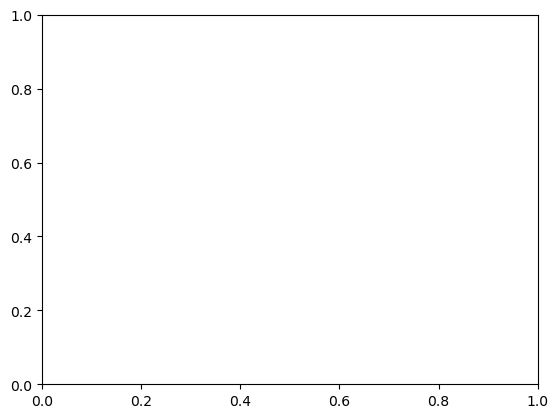

In [62]:
plot_decision_regions(X=X.values,
                      y=Y.values.reshape(-1),
                      clf=svc,
                      legend=4)

In [63]:
#############################################################
##Polynomial function
#SVMfrom sklearn.svm import SVC
svc =SVC(degree=3,kernel='poly')  #Polynomial function

In [64]:
svc.fit(X_train,Y_train)

SVC(kernel='poly')

In [65]:
Y_pred_train = svc.predict(X_train)
Y_pred_test = svc.predict(X_test)

In [66]:
#Metrics
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("training accuracy score:",(ac1*100).round(3))    #training accuracy score: 96.018
ac2 = accuracy_score(Y_test,Y_pred_test)
print("testing accuracy score:",(ac2*100).round(3))     #testing accuracy score: 92.105

training accuracy score: 96.018
testing accuracy score: 92.105


In [70]:
#Validation set approach
training_accuracy = []
test_accuracy = []

In [71]:
for i in range (1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.75,random_state=i)
    svc.fit(X_train,Y_train)
    Y_pred_train = svc.predict(X_train)
    Y_pred_test = svc.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

In [72]:
print("Average training accuracy score:",(np.mean(training_accuracy)*100).round(3))#Average training accuracy score: 95.533
print("Average test accuracy score:",(np.mean(test_accuracy)*100).round(3))   #Average test accuracy score: 95.218

Average training accuracy score: 85.973
Average test accuracy score: 86.447


In [73]:
#Radial Basis Function
#SVM
from sklearn.svm import SVC

In [75]:
svc =SVC(degree=3,kernel='rbf')  #Polynomial function
svc.fit(X_train,Y_train)

SVC()

In [76]:
Y_pred_train = svc.predict(X_train)
Y_pred_test = svc.predict(X_test)

In [77]:
#Metrics
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("training accuracy score:",ac1.round(3))    #training accuracy score: 0.945
ac2 = accuracy_score(Y_test,Y_pred_test)
print("testing accuracy score:",ac2.round(3))     #testing accuracy score: 0.982

training accuracy score: 0.863
testing accuracy score: 0.855


In [78]:
#Validation set approach
training_accuracy = []
test_accuracy = []

In [79]:
for i in range (1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(df_final,Y,train_size=0.75,random_state=i)
    svc.fit(X_train,Y_train)
    Y_pred_train = svc.predict(X_train)
    Y_pred_test = svc.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

In [80]:
print("Average training accuracy score:",(np.mean(training_accuracy)*100).round(3))#Average training accuracy score: 96.976
print("Average test accuracy score:",(np.mean(test_accuracy)*100).round(3))        #Average test accuracy score: 95.236

Average training accuracy score: 99.571
Average test accuracy score: 98.566


In [81]:
# Evaluate the model
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
print("Accuracy:", accuracy_score(Y_test, Y_pred_test))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred_test))

Accuracy: 0.9868421052631579

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.98      1.00      0.99        65

    accuracy                           0.99        76
   macro avg       0.99      0.95      0.97        76
weighted avg       0.99      0.99      0.99        76


Confusion Matrix:
 [[10  1]
 [ 0 65]]


In [82]:
# Visualizing Confusion Matrices:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Small', 'Large'], yticklabels=['Small', 'Large'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

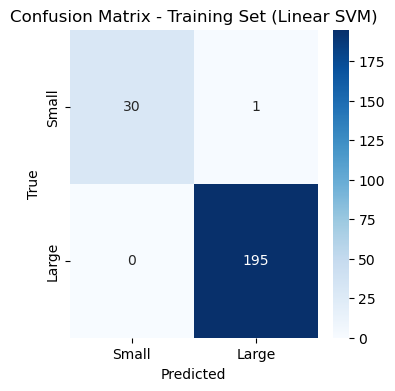

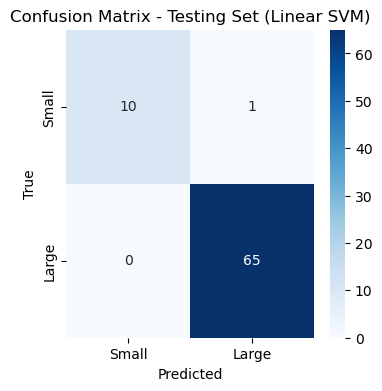

In [84]:
# Plot confusion matrices
plot_confusion_matrix(Y_train, Y_pred_train, 'Confusion Matrix - Training Set (Linear SVM)')
plot_confusion_matrix(Y_test, Y_pred_test, 'Confusion Matrix - Testing Set (Linear SVM)')

In [ ]:
# The linear SVM model exhibits high accuracy on both the training and testing sets
# The polynomial SVM model shows strong performance on both training and testing sets, 
#with slightly lower training accuracy compared to the linear model.
# The RBF SVM model performs well, with a slightly lower training accuracy 
#compared to the polynomial model but comparable testing accuracy